# Regression
---
목표: BMI 지수를 예측한다.

- Multiple Linear Regression

### Read CSV File

In [31]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


null 값 없음

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
X = df.drop(['Outcome', 'BMI'], axis=1)
y = df['BMI']
print(X.head())
print(y.head())
print(X.shape, y.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0            6      148             72             35        0   
1            1       85             66             29        0   
2            8      183             64              0        0   
3            1       89             66             23       94   
4            0      137             40             35      168   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64
(768, 7) (768,)


### Correlation Heatmap

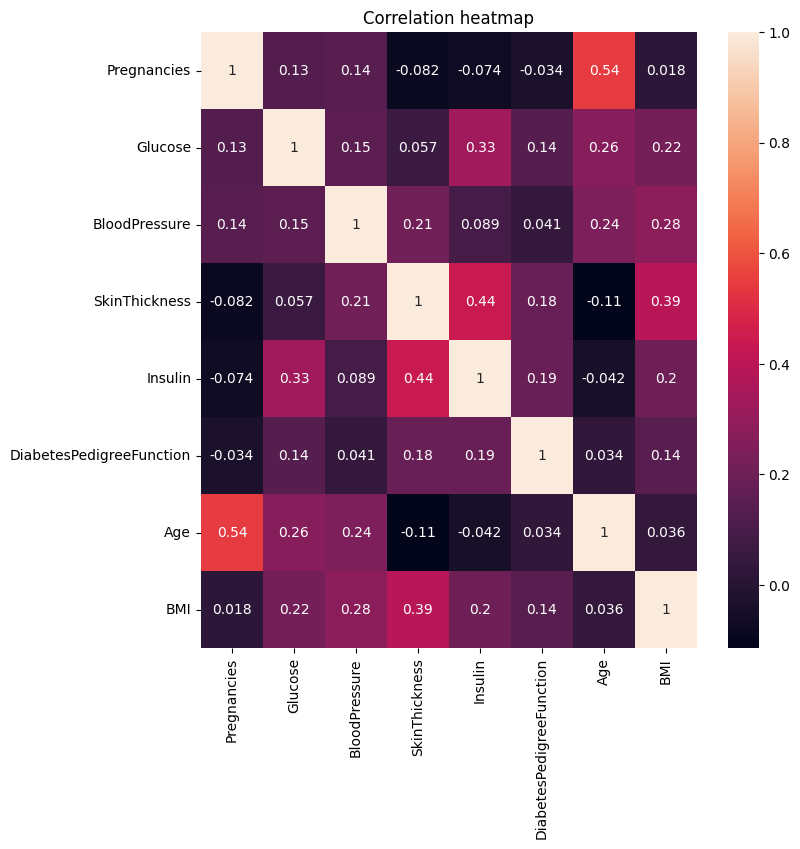

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.concat([X,y], axis=1).corr()

plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, annot=True)
plt.title('Correlation heatmap')
plt.show()


### Feature Importance

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)

Pregnancies                 0.102670
Glucose                     0.151310
BloodPressure               0.172843
SkinThickness               0.275947
Insulin                     0.052196
DiabetesPedigreeFunction    0.118779
Age                         0.126255
dtype: float64


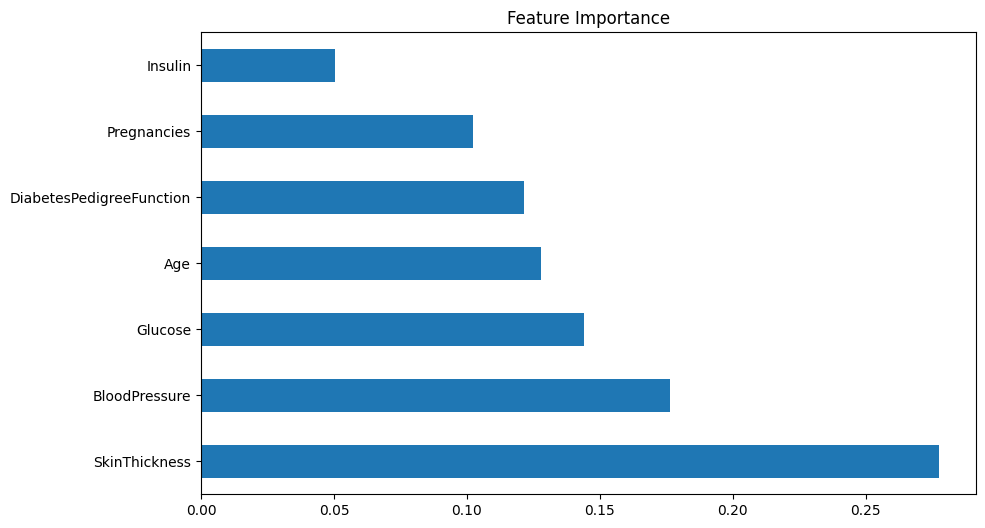

In [37]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
feature_importances.nlargest(7).plot(kind='barh')
plt.show()

### Feature Selection

In [74]:
X_selected = X[['SkinThickness', 'BloodPressure', 'Glucose', 'Age', 'DiabetesPedigreeFunction']]

### Train, test split

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(576, 7) (192, 7)
(576,) (192,)


### Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(X_train)
test_scaled = ss.transform(X_test)

### Multiple Linear Regression



In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
train_poly = poly.fit_transform(train_scaled)
test_poly = poly.transform(test_scaled)

In [82]:
from sklearn.linear_model import LinearRegression

#multiple
lr = LinearRegression()
lr.fit(train_scaled, y_train)
print('multiple score')
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

#poly
lr.fit(train_poly, y_train)
print('poly score')
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

multiple score
0.20523177629880385
0.27702120663291896
poly score
0.3953080276659705
-0.10527339316055806


In [63]:
from sklearn.metrics import (mean_squared_error, r2_score)

#평가
y_pred = lr.predict(test_poly)
print(f"mse = {mean_squared_error(y_test,y_pred)}")
print(f"r2score = {r2_score(y_test, y_pred)}")

mse = 78.70300257457241
r2score = -0.05892576045843434


과소적합 성능이 너무 안좋다.